# ***Rain in Australia - Prediction***

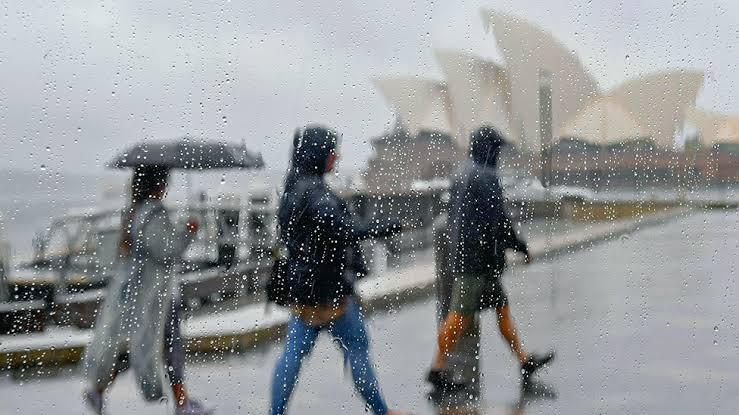

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from google.colab import files


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.RainTomorrow.value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [ ]:
# for value counts
for i in df:
  if df[i].dtypes=='object':
   print(i,'|',df[i].unique())

Date | ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Location | ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir | ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
WindDir9am | ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm | ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Rai

In [ ]:

df.replace(to_replace='NaN', value=np.NaN, inplace=True)

In [ ]:
df = df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Location", "Date"], axis =1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [ ]:
df.dropna(axis=0,inplace=True)
df.shape

(112925, 17)

In [ ]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
# Label encoding
le_dict={}
columns=['WindGustSpeed','WindGustDir','WindDir9am', 'WindDir3pm','RainToday','RainTomorrow']
for col in columns:
  le_dict[col]=LabelEncoder()
  df[col]=le_dict[col].fit_transform(df[col])

In [ ]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,20,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,20,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,21,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,9,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,18,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [ ]:
df['RainTomorrow'].value_counts()

RainTomorrow
0    87906
1    25019
Name: count, dtype: int64

In [ ]:
isnot=df[df.RainTomorrow==0].sample(25019)
isT=df[df.RainTomorrow==1]
df=pd.concat([isnot,isT]).sort_index()

# instead of sampling

In [ ]:
df['RainTomorrow'].value_counts()

RainTomorrow
0    25019
1    25019
Name: count, dtype: int64

In [ ]:
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [ ]:
x.head

<bound method NDFrame.head of         MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
6          14.3     25.0       0.0           13             23          12   
8           9.7     31.9       0.0            6             39           9   
10         13.4     30.4       0.0            3             12          10   
11         15.9     21.7       2.2            5             13           4   
12         15.9     18.6      15.6           13             29           6   
...         ...      ...       ...          ...            ...         ...   
112902      1.5     19.2       0.0            0             16           2   
112909      3.4     19.8       0.0            0             19           2   
112920      3.5     21.8       0.0            0             13           2   
112922      3.6     25.3       0.0            6              8           9   
112923      5.4     26.9       0.0            3             16           9   

        WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
6               13          20.0          24.0         49.0         19.0   
8                7           7.0          28.0         42.0          9.0   
10               2          17.0           6.0         48.0         22.0   
11               1          15.0          13.0         89.0         91.0   
12               6          28.0          28.0         76.0         93.0   
...            ...           ...           ...          ...          ...   
112902           2          17.0          22.0         45.0         18.0   
112909           0          19.0          24.0         54.0         23.0   
112920           0          15.0          13.0         59.0         27.0   
112922           3          13.0           9.0         56.0         21.0   
112923          14           9.0           9.0         53.0         24.0   

        Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  
6            1009.6       1008.2     18.1     24.6          0  
8            1008.9       1003.6     18.3     30.2          0  
10           1011.8       1008.7     20.4     28.8          0  
11           1010.5       1004.2     15.9     17.0          1  
12            994.3        993.0     17.4     15.8          1  
...             ...          ...      ...      ...        ...  
112902       1030.7       1026.7      6.8     17.6          0  
112909       1031.8       1027.7      8.7     18.9          0  
112920       1024.7       1021.2      9.4     20.9          0  
112922       1023.5       1019.1     10.9     24.5          0  
112923       1021.0       1016.8     12.5     26.1          0  

[50038 rows x 16 columns]>

In [ ]:
# scatter plot against
plt.figure(figsize = (7,7))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df)

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

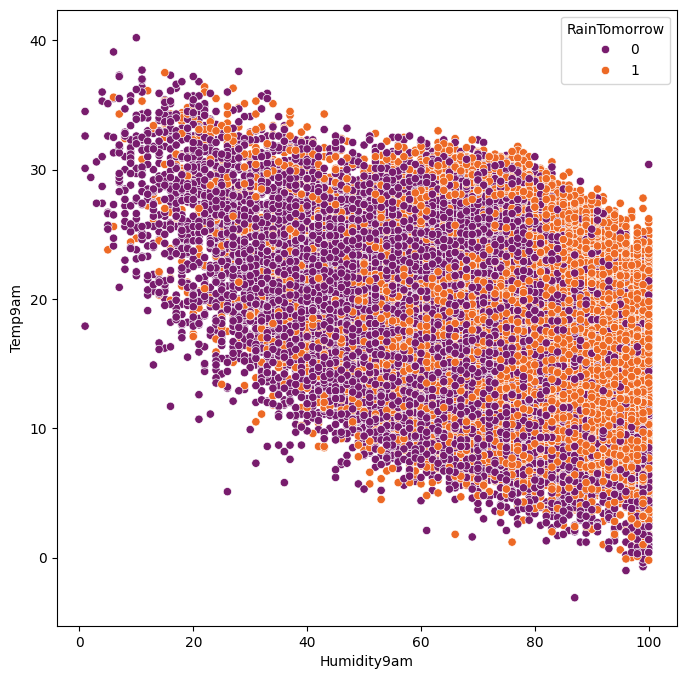

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df)

<Axes: >

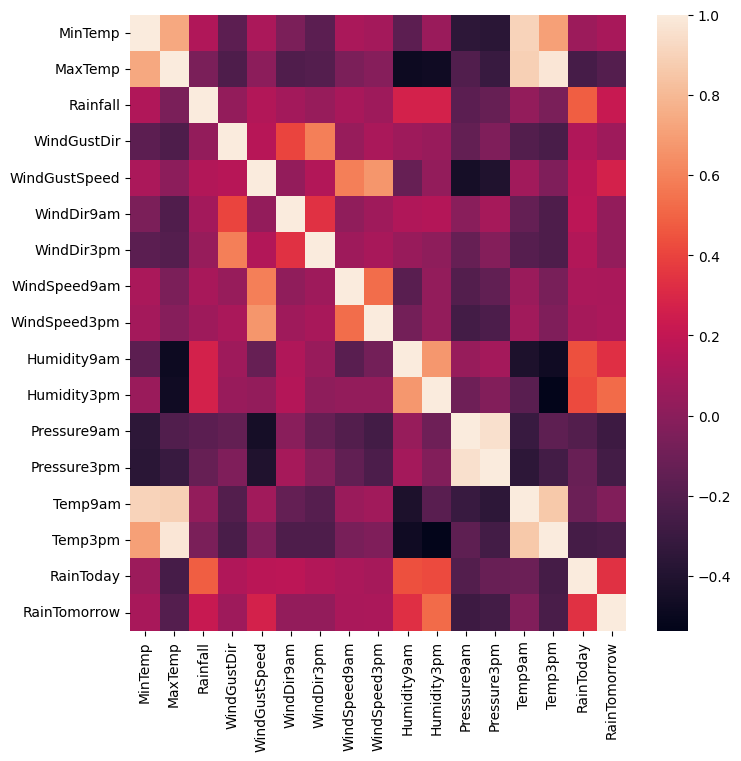

In [ ]:
# # HEAT MAP
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir        int64
WindGustSpeed      int64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [ ]:
# KNN
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)

In [ ]:
# SVC
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)

In [ ]:
# Naive bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train_scaled, y_train)
y_pred_dt = decision_tree.predict(x_test_scaled)


In [ ]:
#XGB
xgb = XGBClassifier()
xgb.fit(x_train_scaled, y_train)
y_pred_xgb = xgb.predict(x_test_scaled)

In [ ]:
# Random forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [ ]:
# accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)


accuracy_nb = accuracy_score(y_test, y_pred_nb)
# classification report
report_knn = classification_report(y_test, y_pred_knn)
report_svm = classification_report(y_test, y_pred_svm)
report_nb = classification_report(y_test, y_pred_nb)
report_rf = classification_report(y_test, y_pred_rf)
report_dt = classification_report(y_test, y_pred_dt)
report_xgb = classification_report(y_test, y_pred_xgb)

print("KNN Accuracy:", accuracy_knn)
print("SVM Accuracy:", accuracy_svm)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Random Forest Accuracy:", accuracy_rf)
print("Decision Tree Accuracy:", accuracy_dt)
print("XGBoost Accuracy:", accuracy_xgb)

print("KNN Report:")
print(report_knn)

print("SVM Report:")
print(report_svm)

print("Naive Bayes Report:")
print(report_nb)

print("Naive Bayes Report")
print (report_nb)

print("Random Forest Report")
print(report_rf)

print("Decision Tree Report")
print(report_dt)

print("XGBoost Report")
print(report_xgb)




KNN Accuracy: 0.7653210764721556
SVM Accuracy: 0.7926325606181721
Naive Bayes Accuracy: 0.731148414601652
Random Forest Accuracy: 0.793365307753797
Decision Tree Accuracy: 0.7130295763389288
XGBoost Accuracy: 0.7937649880095923
KNN Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      7481
           1       0.77      0.76      0.76      7531

    accuracy                           0.77     15012
   macro avg       0.77      0.77      0.77     15012
weighted avg       0.77      0.77      0.77     15012

SVM Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      7481
           1       0.80      0.79      0.79      7531

    accuracy                           0.79     15012
   macro avg       0.79      0.79      0.79     15012
weighted avg       0.79      0.79      0.79     15012

Naive Bayes Report:
              precision    recall  f1-score   support

           0       

In [ ]:

param_grid = {
    'max_depth': [5, 10, 20, 30, 50, 70, 90, 100, 120],
    'max_features': [5, 10, 15, 20],
    'min_samples_split': [5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [5, 10, 15, 20],
    'class_weight': ['balanced'],
}

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=10, scoring='accuracy', cv=5, verbose=1,
                                   random_state=42)

random_search.fit(x_train, y_train)

print(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
rf = RandomForestClassifier(min_samples_split= 30, min_samples_leaf= 5, max_features=5, max_depth= 70, class_weight= 'balanced')
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)


print("Random Forest Accuracy:", accuracy_rf)

print("Random Forest Report")
print(report_rf)

Random Forest Accuracy: 0.793365307753797
Random Forest Report
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      7481
           1       0.80      0.79      0.79      7531

    accuracy                           0.79     15012
   macro avg       0.79      0.79      0.79     15012
weighted avg       0.79      0.79      0.79     15012



In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 64.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 70.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
needed_files={'LabelEncoder':le_dict,'model':rf,'scaler':scaler}
import pickle
file=open('file.pkl','wb')
pickle.dump(needed_files,file)

In [ ]:
file1=open('file.pkl','rb')
rs=pickle.load(file1)
rs

{'LabelEncoder': {'WindGustSpeed': LabelEncoder(),
  'WindGustDir': LabelEncoder(),
  'WindDir9am': LabelEncoder(),
  'WindDir3pm': LabelEncoder(),
  'RainToday': LabelEncoder(),
  'RainTomorrow': LabelEncoder()},
 'model': RandomForestClassifier(class_weight='balanced', max_depth=70, max_features=5,
                        min_samples_leaf=5, min_samples_split=30),
 'scaler': StandardScaler()}

In [ ]:
!jupyter nbconvert --to html '/content/rain_in_australia_prediction.ipynb'

In [ ]:
# prompt: create a function to predict rain and input values using streamlit

import streamlit as st
import pickle
import numpy as np


def predict_rain(data):
    model = pickle.load(open('file.pkl', 'rb'))
    scaler = model['scaler']
    le_dict = model['LabelEncoder']
    columns=['WindGustSpeed','WindGustDir','WindDir9am', 'WindDir3pm','RainToday','RainTomorrow']
    for col in columns:
        data[col]=le_dict[col].transform(data[col])
    data_scaled = scaler.transform([data])
    prediction = model['model'].predict(data_scaled)
    if prediction[0] == 0:
        return "No Rain"
    else:
        return "Rain"


def main():
    st.title('Rain Prediction')
    MaxTemp = st.number_input('MaxTemp', min_value=1.0, max_value=48.1)
    Rainfall = st.number_input('Rainfall', min_value=0.0, max_value=160.3)
    Evaporation = st.number_input('Evaporation', min_value=0.0, max_value=145.0)
    WindGustSpeed = st.number_input('WindGustSpeed', min_value=6.0, max_value=130.0)
    WindGustDir = st.number_input('WindGustDir', min_value=0.0, max_value=360.0)
    WindDir9am = st.number_input('WindDir9am', min_value=0.0, max_value=360.0)
    WindDir3pm = st.number_input('WindDir3pm', min_value=0.0, max_value=360.0)
    Humidity9am = st.number_input('Humidity9am', min_value=0.0, max_value=100.0)
    Pressure9am = st.number_input('Pressure9am', min_value=918.3, max_value=1041.0)
    Pressure3pm = st.number_input('Pressure3pm', min_value=918.3, max_value=1041.0)
    Temp9am = st.number_input('Temp9am', min_value=-7.2, max_value=40.2)
    Temp3pm = st.number_input('Temp3pm', min_value=-5.4, max_value=46.7)
    RainToday = st.number_input('RainToday', min_value=0, max_value=1)
    if st.button('Predict'):
        data = {'MaxTemp': [MaxTemp],
                'Rainfall': [Rainfall],
                'Evaporation': [Evaporation],
                'WindGustSpeed': [WindGustSpeed],
                'WindGustDir': [WindGustDir],
                'WindDir9am': [WindDir9am],
                'WindDir3pm': [WindDir3pm],
                'Humidity9am': [Humidity9am],
                'Pressure9am': [Pressure9am],
                'Pressure3pm': [Pressure3pm],
                'Temp9am': [Temp9am],
                'Temp3pm': [Temp3pm],
                'RainToday': [RainToday]}
        prediction = predict_rain(data)
        st.write('Prediction:', prediction)


if __name__ == '__main__':
    main()
